In [38]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use("seaborn")
from pylab import rcParams
from icecream import ic
plt.rcParams["figure.dpi"] = 100
np.set_printoptions(formatter={"float": "{:0.16}".format})

In [36]:
x = 1
y = 3.50e-05
z = 4.82e-05

ic((x+y)+z, x+(y+z))

ic| (x+y)+z: 1.0000832, x+(y+z): 1.0000832


(1.0000832, 1.0000832)

In [39]:
ic((y+z)*(x**-1), (y+z) / x)

ic| (y+z)*(x**-1): 8.319999999999999e-05
    (y+z) / x: 8.319999999999999e-05


(8.319999999999999e-05, 8.319999999999999e-05)

## Exercice 1

We need to show that the round-off error leads to not to fulfill the associative property of addition. To prove that we consider the following infinite series:
$$
\mathcal{S} : \sum_{0}^{\infty} \dfrac{1}{i^4} = \dfrac{\pi^4}{90}
$$

In the following notebook we gonna implement different version of the summed series, both ascending and descending order and both using the standard python library and numpy library.

*From wikipedia*: *numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.*

In [51]:
sumSeries_Def = np.divide(np.power(np.pi, 4), 90)
sumSeries_Def

1.082323233711138

In [53]:
def sumSeriesA(n):
    """
    n: Number of terms to be taken into account
    output: Sum of the first n terms summed in ascending order,
            array containing the values for the sum
    """
    all_val = []
    sum = 0
    for i in range(1, n + 1):
        value = np.divide(1, np.power(i, 4))
        sum += value
        all_val.append(value)
    return sum, all_val

In [54]:
def sumSeriesA_opt(n):
    """
    n: Number of terms to be taken into account
    output: Sum of the first n terms summed in ascending order,
            array containing the values for the sum
    """
    all_val = np.array([np.divide(1, np.power(i,4)) for i in range(1,n+1)], np.float64)
    return np.sum(all_val), all_val

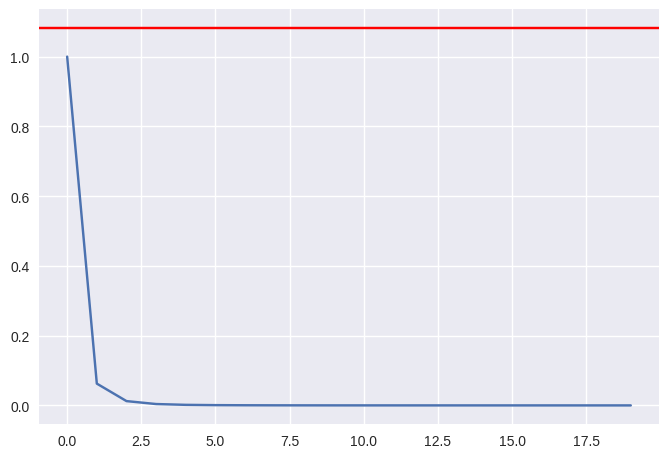

In [55]:
sum_a, out = sumSeriesA_opt(20)

plt.plot(out)
plt.axhline(y=np.divide(np.power(np.pi, 4), 90), color="r", linestyle="-")

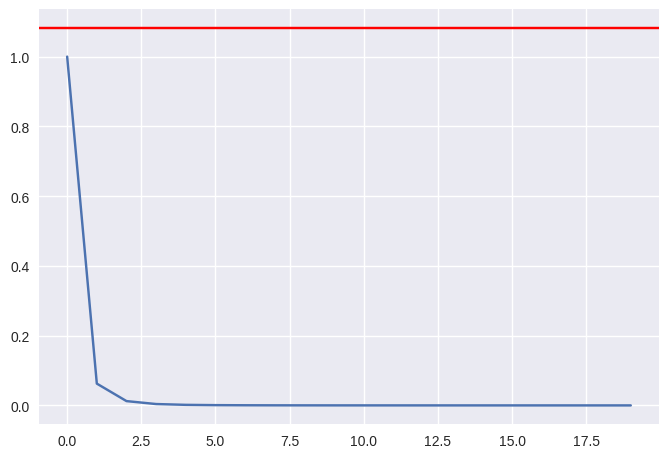

In [7]:
sum_a_opt, out_opt = sumSeriesA_opt(20)
plt.plot(out_opt)
plt.axhline(y=np.divide(np.power(np.pi, 4), 90), color="r", linestyle="-")

In [56]:
def sumSeriesD(n):
    """
    n: Number of terms to be taken into account
    output: Sum of the first n terms summed in descending order,
            array containing the values for the sum
    """
    sum = 0
    all_val = []
    for i in range(n, 0, -1):
        value = np.divide(1, np.power(i, 4))
        sum += value
        all_val.append(value)
    return sum, all_val

In [9]:
def sumSeriesD_opt(n):
    all_val = np.array([np.divide(1, np.power(i,4)) for i in range(n,0,-1)], dtype=np.float64)
    return np.sum(all_val), all_val

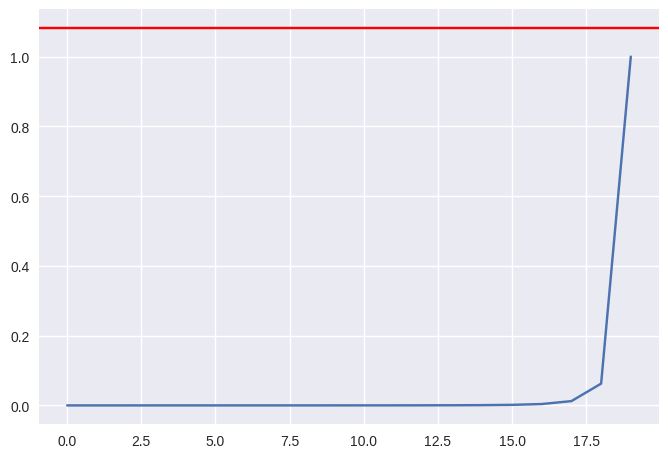

In [10]:
sum_d, out_d = sumSeriesD_opt(20)
plt.plot(out_d)
plt.axhline(y=np.divide(np.power(np.pi, 4), 90), color="r", linestyle="-")

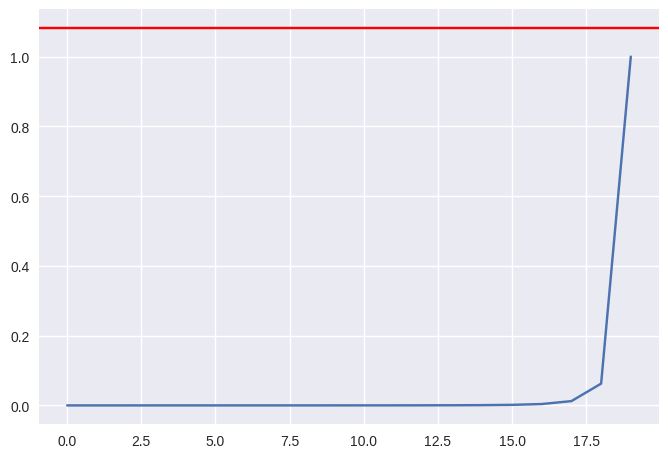

In [11]:
sum_d_opt, out_d_opt = sumSeriesD_opt(20)
plt.plot(out_d_opt)
plt.axhline(y=np.divide(np.power(np.pi, 4), 90), color="r", linestyle="-")

In [12]:
def sumSeries(n):
    out_a = sumSeriesA(n)[0]
    out_d = sumSeriesD(n)[0]
    comp_a = sumSeries_Def - out_a
    comp_d = sumSeries_Def - out_d
    return comp_a, comp_d

comp_a, comp_d = sumSeries(20)

In [13]:
def sumSeries_opt(n):
    out_a = sumSeriesA_opt(n)[0]
    out_d = sumSeriesD_opt(n)[0]
    comp_a = sumSeries_Def - out_a
    comp_d = sumSeries_Def - out_d
    return comp_a, comp_d

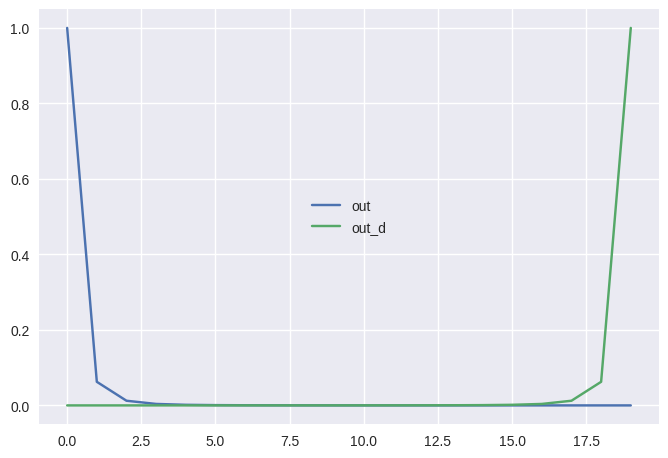

In [14]:
plt.plot(out, label = "out")
plt.plot(out_d, label = "out_d")
plt.legend(loc='center')
plt.show()

In [15]:
#calculate differences to sumseries_Def
iterations = 2000
differences_a = []
differences_d = []
comp_differences = []
for i in range (10, iterations):
    difference_a, difference_d = sumSeries(i)
    differences_a.append(difference_a)
    differences_d.append(difference_d)
    comp_differences.append(difference_d - difference_a)

In [16]:
iterations = 2000
difference_a_opt_arr = np.array([], dtype=np.float64)
difference_d_opt_arr = np.array([], dtype=np.float64)
comp_difference_opt_arr = np.array([], dtype=np.float64)
for i in range(10,iterations):
    difference_a_opt = sumSeriesA_opt(i)[0]
    difference_d_opt = sumSeriesD_opt(i)[0]
    difference_a_opt_arr = np.append(difference_a_opt_arr, difference_a_opt)
    difference_d_opt_arr = np.append(difference_a_opt_arr, difference_d_opt)
    comp_difference_opt_arr = np.append(comp_difference_opt_arr, difference_d_opt - difference_a_opt)

Show difference to actual number depending on n

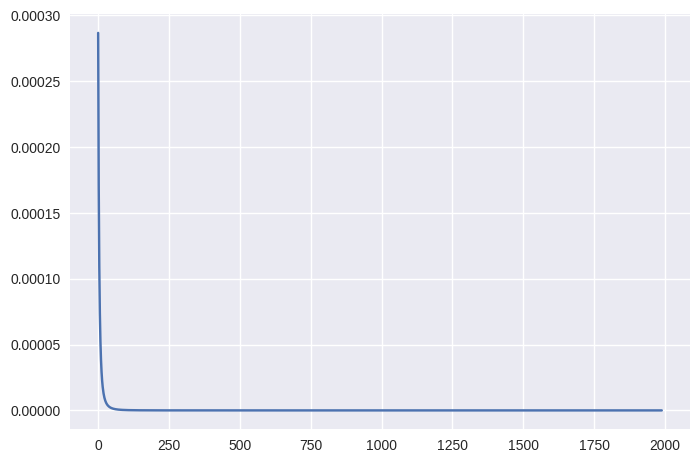

In [17]:
dif_a = plt.plot(differences_a)
plt.show(dif_a)

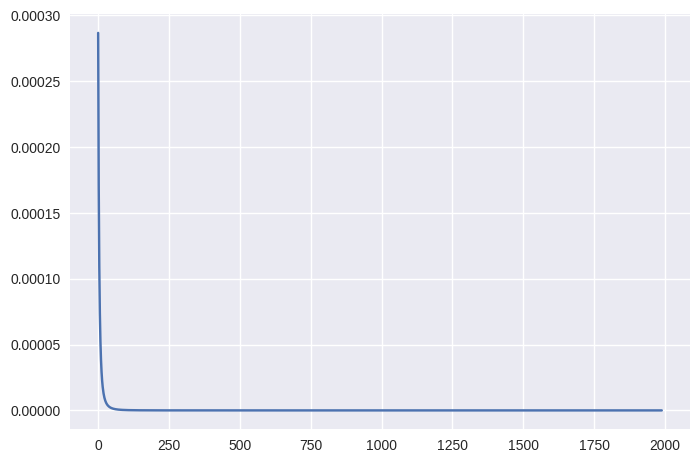

In [18]:
dif_d = plt.plot(differences_d)
plt.show(dif_d)

 Print values, for which SumSeriesA and SumSeriesD are not equal

In [19]:
counter = 0
arr_a = []
arr_d = []
for i in range(0,100):
    arr_a.append(sumSeriesA(i)[0])
    arr_d.append(sumSeriesD(i)[0])
    if arr_a[i] != arr_d[i]:
       counter += 1
print(counter)

a, arr_a = sumSeriesA(13)
d, arr_d = sumSeriesD(13)

1.0 + 3.501277966457757e-05 + 4.8225308641975306e-05


42


1.0000832380883067

Plot SumSeriesD - SumSeriesA


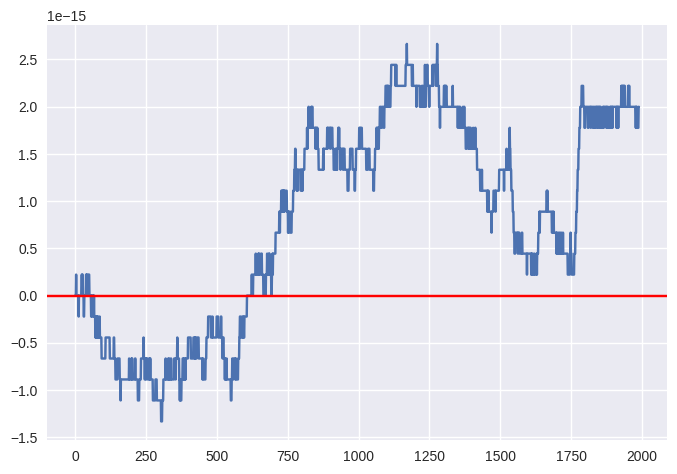

In [20]:
dif_comp = plt.plot(comp_differences)
plt.axhline(y=0, color="r", linestyle="-")

plt.show(dif_comp)

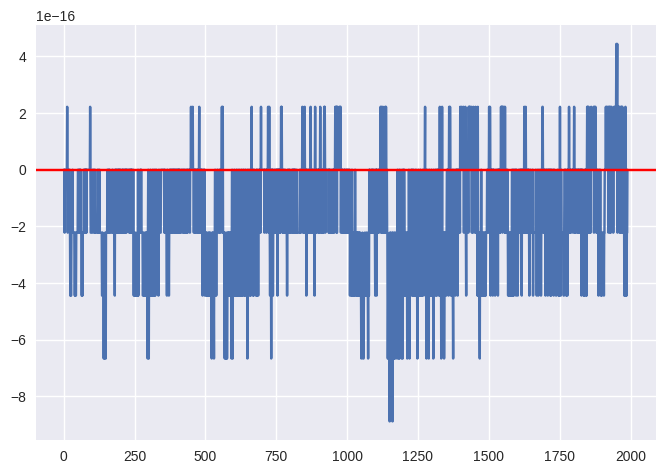

In [21]:
# Numpy array difference

dif_comp_opt = plt.plot(comp_difference_opt_arr)
plt.axhline(y=0, color="r", linestyle="-")

plt.show(dif_comp_opt)

# Tarea 2

define functions

In [40]:
def quadratic1(a, b, c):
    x1 = np.divide(-b - np.sqrt(np.power(b, 2) - 4*a*c), 2*a)
    x2 = np.divide(-b + np.sqrt(np.power(b, 2) - 4*a*c), 2*a)
    return x1, x2 

def quadratic2(a, b, c):
    x1 = np.divide(2*c, -b + np.sqrt(np.power(b, 2) -4*a*c))
    x2 = np.divide(2*c, -b - np.sqrt(np.power(b, 2) -4*a*c))
    return x1, x2

def quadratic3(a, b, c):
    q = -1/2* (b + np.sign(b)*np.sqrt(np.power(b, 2)- 4*a*c))
    x1 = np.divide(q, a)
    x2 = np.divide(c, q)
    return x1, x2

In [49]:
a, b, c = 3, 0, -9
numerator_1 = -b - np.sqrt(np.power(b, 2) - 4*a*c)
denominator_1 = 2*a

numerator_2 = 2*c
denominator_2 = -b + np.sqrt(np.power(b, 2) -4*a*c)

ic(numerator_1, denominator_1, numerator_2, denominator_2, quadratic1(a,b,c), quadratic2(a,b,c))

ic| numerator_1: -10.392304845413264
    denominator_1: 6
    numerator_2: -18
    denominator_2: 10.392304845413264
    quadratic1(a,b,c): (-1.7320508075688774, 1.7320508075688774)
    quadratic2(a,b,c): (-1.7320508075688772, 1.7320508075688772)


(-10.392304845413264,
 6,
 -18,
 10.392304845413264,
 (-1.7320508075688774, 1.7320508075688774),
 (-1.7320508075688772, 1.7320508075688772))

Division requires iterative subtraction that cannot be performed simultaneously so it takes longer. In fact, some Floating Point units speed up division by performing a reciprocal approximation and multiplying by that. It isn't quite as accurate but is somewhat faster. As we show here from the mathematical point of view we do the same operation but the results are different because the reason above.

In [48]:
denominator_2 / denominator_1 == denominator_2 * (denominator_1 **-1)

False

In [43]:
def show_equivalence(a, b, c):
    out1_1, out1_2 = quadratic1(a, b, c)
    out2_1, out2_2 = quadratic2(a, b, c)
    out3_1, out3_2 = quadratic3(a, b, c)

    # print('{0:.20f}'.format(out1_1))
    print(out1_1, out1_2)
    print(out2_1, out2_2)
    print(out3_1, out3_2)


In [44]:
show_equivalence(1, 5, 6)

-3.0 -2.0
-3.0 -2.0
-3.0 -2.0


In [45]:
show_equivalence(3, 0 , -9)

-1.7320508075688774 1.7320508075688774
-1.7320508075688772 1.7320508075688772
-0.0 inf


/tmp/ipykernel_467/2395113372.py:14: RuntimeWarning: divide by zero encountered in true_divide
  x2 = np.divide(c, q)


In [46]:
show_equivalence(2, 4, -5)

-2.8708286933869704 0.8708286933869707
-2.870828693386971 0.8708286933869708
-2.8708286933869704 0.8708286933869708
